In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Train and Test data

In [2]:
X_train = []
y_train = []

for i in os.listdir('train/'):
    for j in os.listdir(f'train/{i}'):
        img = mpimg.imread(f'train/{i}/{j}')
        img = img.reshape(48, 48, 1)
        X_train.append(img)
        y_train.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [3]:
X_test = []
y_test = []

for i in os.listdir('test/'):
    for j in os.listdir(f'test/{i}'):
        img = mpimg.imread(f'test/{i}/{j}')
        img = img.reshape(48, 48, 1)
        X_test.append(img)
        y_test.append(i)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
X_train.shape

(28709, 48, 48, 1)

In [9]:
X_test.shape

(7178, 48, 48, 1)

In [10]:
y_train.shape

(28709,)

In [11]:
y_test.shape

(7178,)

In [5]:
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_test)

In [6]:
y_train_cat = to_categorical(y_train_label , num_classes=7)
y_test_cat = to_categorical(y_test_label , num_classes=7)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Keraas Model NN

In [9]:
from keras import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , BatchNormalization , Dropout
from keras.optimizers import Adam

In [72]:
model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())

model.add(Dense(units=512 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256 , activation='relu'))
model.add(Dense(units=7 , activation='sigmoid'))

In [73]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy' , metrics=(['accuracy']))

In [ ]:
model.fit(X_train , y_train_cat , validation_data=(X_test , y_test_cat) , epochs=5 , batch_size=128)

Epoch 1/5
 96/225 ━━━━━━━━━━━━━━━━━━━━ 2:29 1s/step - accuracy: 0.1872 - loss: 377940.6250

In [58]:
test_img = mpimg.imread('png-clipart-surprise-facial-expression-web-design-graph-face-woman-web-design-hand-thumbnail.png')

In [59]:
test_img = cv2.cvtColor(test_img , cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img , (48, 48))

In [60]:
test_img = test_img / 255

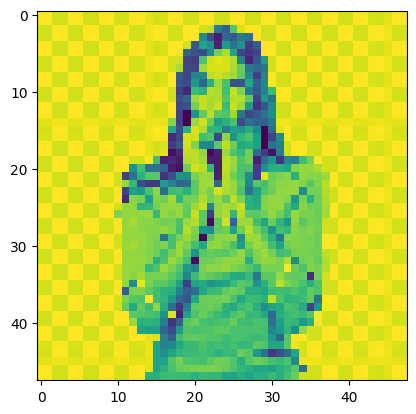

In [61]:
plt.imshow(test_img)

In [62]:
test_img = test_img.reshape(1, 48, 48, 1)

In [63]:
pred = model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [64]:
pred

array([[0.4739384 , 0.22750485, 0.7990593 , 0.2334317 , 0.294196  ,
        0.8987102 , 0.2199711 ]], dtype=float32)

In [57]:
label.classes_

array(['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype='<U9')

In [65]:
model.save('emotion.h5')